In [61]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC #support vector machines

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [62]:
data = pd.read_csv('data/train.csv')

In [63]:
data

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


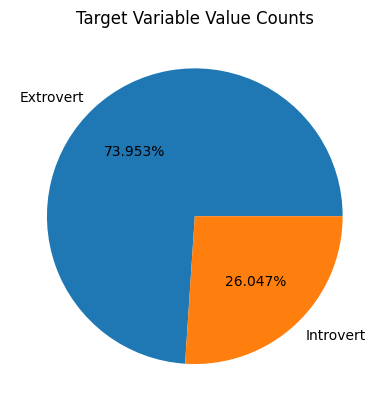

In [64]:
# get the set of distinct classes
labels = data.Personality.unique()

# get the count of each class
sizes = data.Personality.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

In [65]:
data.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [67]:
#drop nan values
data = data.dropna()

#convert categorical data to numerical value
data['Stage_fear'] = data['Stage_fear'].map({'Yes': 1, 'No': 0})
data['Stage_fear'] = data['Stage_fear'].astype(float)
data['Drained_after_socializing'] = data['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
data['Drained_after_socializing'] = data['Drained_after_socializing'].astype(float)
data['Personality'] = data['Personality'].map({'Introvert': 1, 'Extrovert': 0})
data['Personality'] = data['Personality'].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10189 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10189 non-null  int64  
 1   Time_spent_Alone           10189 non-null  float64
 2   Stage_fear                 10189 non-null  float64
 3   Social_event_attendance    10189 non-null  float64
 4   Going_outside              10189 non-null  float64
 5   Drained_after_socializing  10189 non-null  float64
 6   Friends_circle_size        10189 non-null  float64
 7   Post_frequency             10189 non-null  float64
 8   Personality                10189 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 796.0 KB


In [68]:
data

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,0.0
1,1,1.0,0.0,7.0,3.0,0.0,10.0,8.0,0.0
3,3,3.0,0.0,7.0,3.0,0.0,11.0,5.0,0.0
7,7,2.0,0.0,8.0,3.0,0.0,4.0,5.0,0.0
9,9,1.0,0.0,8.0,6.0,0.0,14.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...
18509,18509,1.0,0.0,3.0,4.0,0.0,15.0,4.0,0.0
18511,18511,0.0,0.0,4.0,5.0,0.0,11.0,4.0,0.0
18514,18514,6.0,0.0,5.0,3.0,0.0,10.0,4.0,0.0
18519,18519,3.0,0.0,7.0,3.0,0.0,9.0,7.0,0.0


<Axes: >

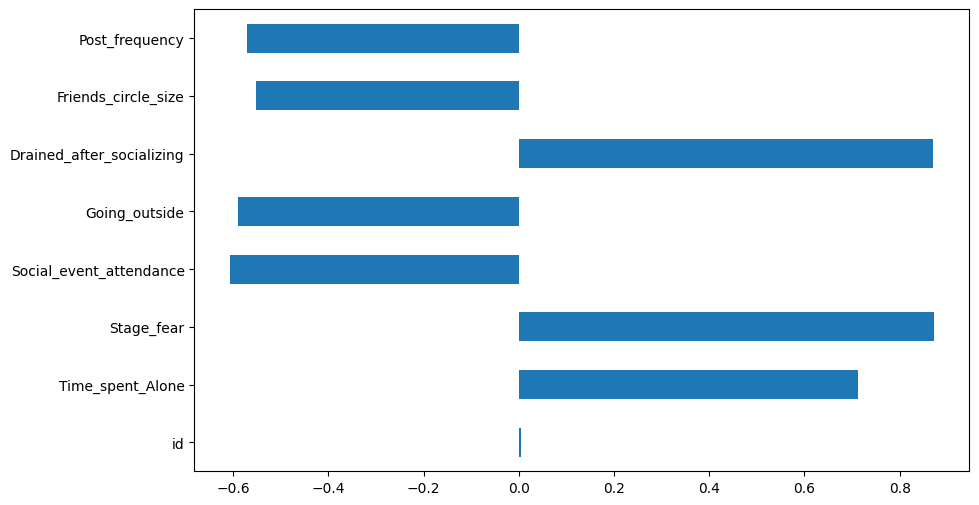

In [69]:
correlation_values = data.corr()['Personality'].drop('Personality')
correlation_values.plot(kind='barh', figsize=(10, 6))

In [70]:
from sklearn.preprocessing import StandardScaler
y = data['Personality']
X = data.drop(['Personality','id'], axis=1)
X_norm = StandardScaler().fit(X).transform(X)



In [71]:
X_norm

array([[-1.00100437, -0.44766122,  0.12263342, ..., -0.44781917,
         1.59507623, -0.18482918],
       [-0.62084732, -0.44766122,  0.50769101, ..., -0.44781917,
         0.36751065,  0.92229872],
       [ 0.13946678, -0.44766122,  0.50769101, ..., -0.44781917,
         0.61302377, -0.18482918],
       ...,
       [ 1.27993793, -0.44766122, -0.26242417, ..., -0.44781917,
         0.36751065, -0.55387182],
       [ 0.13946678, -0.44766122,  0.50769101, ..., -0.44781917,
         0.12199754,  0.55325608],
       [-0.62084732, -0.44766122,  0.8927486 , ..., -0.44781917,
        -1.10556804,  0.55325608]])

In [72]:
y

0        0.0
1        0.0
3        0.0
7        0.0
9        0.0
        ... 
18509    0.0
18511    0.0
18514    0.0
18519    0.0
18523    0.0
Name: Personality, Length: 10189, dtype: float64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

In [74]:
LR = LogisticRegression().fit(X_train,y_train)

In [75]:
from sklearn.metrics import accuracy_score, log_loss

y_pred = LR.predict(X_test)
y_pred_proba = LR.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Log Loss: {logloss:.4f}")


Accuracy: 0.9581
Log Loss: 0.1630


In [76]:
LR = LogisticRegression().fit(X_train, y_train)

#1 or 0
y_pred = LR.predict(X_test)

# Predict class probabilities (for log loss)
y_pred_proba = LR.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate log loss
loss = log_loss(y_test, y_pred_proba)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Log Loss: {loss:.4f}")

Test Accuracy: 0.9581
Test Log Loss: 0.1630


# Using SVM

In [77]:
from sklearn.svm import SVC

svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

# Predict class probabilities
y_pred_proba_svm = svm_model.predict_proba(X_test)

# Accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Log Loss
svm_logloss = log_loss(y_test, y_pred_proba_svm)

# Logistic Regression results
y_pred_lr = LR.predict(X_test)
y_proba_lr = LR.predict_proba(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_logloss = log_loss(y_test, y_proba_lr)

print("Model Comparison:")
print(f"Logistic Regression -> Accuracy: {lr_accuracy:.4f}, Log Loss: {lr_logloss:.4f}")
print(f"SVM                 -> Accuracy: {svm_accuracy:.4f}, Log Loss: {svm_logloss:.4f}")


Model Comparison:
Logistic Regression -> Accuracy: 0.9581, Log Loss: 0.1630
SVM                 -> Accuracy: 0.9581, Log Loss: 0.1629
